# Stage de fin d'étude  2020-2021
# Salma CHAFAI 


# Optimisation des matériaux et les appareils en utilisant le d'expériences (DoE) et l'apprentissage automatique (AA) (ML : Machine Learning) : 

# Premier exemple : Les cellules photovoltaïques organiques (OPV) 



# Notre approche

## 1 - Importation des bibliothèques utilisées :

### (a) Bibliothèques usuelles

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from math import sqrt

### (b) Bibliothèques statistiques 

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### (c) Bibliothèques de l'apprenrissage artificiel 

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

#### Mesures de performance et des erreurs du modèle

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Les modèles de l'apprentissage artificiel utilisés

In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.datasets import make_regression

## 2. Les données  du problème

### (a) Statistiques des données

In [6]:
df = pd.read_csv("C:/Users/salma/OneDrive/Bureau/Stage 2020-2021/Machine Learning/Publications/OPV_publication/Data/table1_1.csv")
df

,exp,don_con,total_con,spin_s,addive,pce,nb_dev
0,1,10,20,3000,2,0.05000,14
1,2,10,25,1000,8,3.24000,10
2,3,10,10,600,0,0.01600,14
3,4,10,15,2000,12,0.00040,10
4,5,25,20,600,12,7.14000,8
5,6,25,15,1000,2,3.22000,8
6,7,25,10,3000,8,0.00033,14
7,8,25,25,2000,0,7.21000,11
8,9,40,10,1000,12,1.85000,3
9,10,40,20,2000,8,6.16000,12


In [7]:
# Informations sur les attributs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   exp        15 non-null     int64  
 1   don_con    15 non-null     int64  
 2   total_con  15 non-null     int64  
 3   spin_s     15 non-null     int64  
 4   addive     15 non-null     int64  
 5   pce        15 non-null     float64
 6   nb_dev     15 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 968.0 bytes


In [8]:
# Les statistiques du jeu de données :
df.describe()

,exp,don_con,total_con,spin_s,addive,pce,nb_dev
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000
mean,8.000000,31.000000,17.000000,1560.000000,5.066667,2.885782,10.00000
std,4.472136,16.818357,5.606119,923.347946,4.772940,2.496247,3.48466
min,1.000000,10.000000,10.000000,600.000000,0.000000,0.000330,3.00000
25%,4.500000,17.500000,12.500000,800.000000,1.000000,0.605000,8.50000
50%,8.000000,25.000000,15.000000,1000.000000,2.000000,3.180000,10.00000
75%,11.500000,40.000000,20.000000,2000.000000,8.000000,3.895000,12.50000
max,15.000000,55.000000,25.000000,3000.000000,12.000000,7.210000,14.00000


array([[<AxesSubplot:title={'center':'don_con'}>,
        <AxesSubplot:title={'center':'total_con'}>],
       [<AxesSubplot:title={'center':'spin_s'}>,
        <AxesSubplot:title={'center':'addive'}>],
       [<AxesSubplot:title={'center':'pce'}>, <AxesSubplot:>]],
      dtype=object)

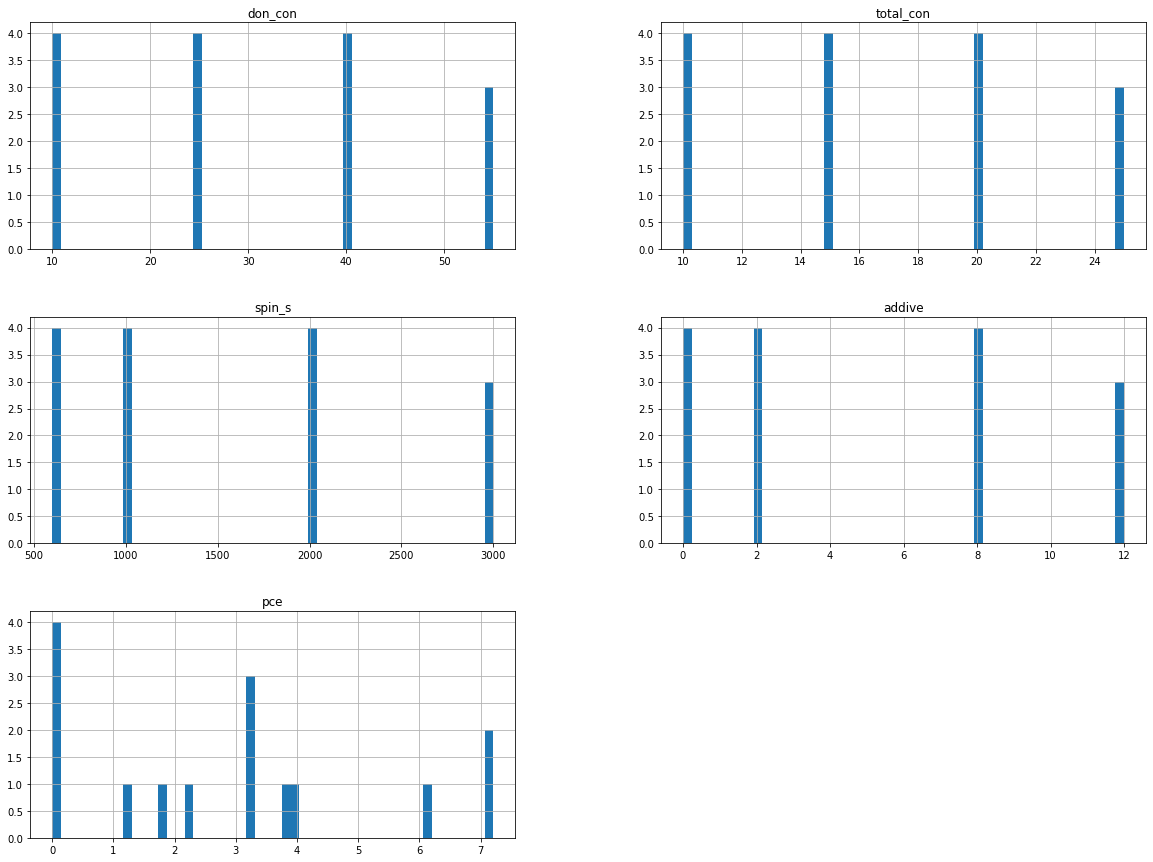

In [9]:
# L'histogramme 
df1 = df[['don_con','total_con','spin_s','addive','pce']]
df1.hist(bins=50, figsize=(20, 15))

In [10]:
# Input contains NaN, infinity or a value too large for dtype('float64')
df['pce'] = df['pce'].astype(float)  
df

,exp,don_con,total_con,spin_s,addive,pce,nb_dev
0,1,10,20,3000,2,0.05000,14
1,2,10,25,1000,8,3.24000,10
2,3,10,10,600,0,0.01600,14
3,4,10,15,2000,12,0.00040,10
4,5,25,20,600,12,7.14000,8
5,6,25,15,1000,2,3.22000,8
6,7,25,10,3000,8,0.00033,14
7,8,25,25,2000,0,7.21000,11
8,9,40,10,1000,12,1.85000,3
9,10,40,20,2000,8,6.16000,12


#### Corrélation

In [11]:
df1.corr()

,don_con,total_con,spin_s,addive,pce
don_con,1.000000,-0.136364,-0.149028,-0.138812,0.255689
total_con,-0.136364,1.000000,-0.149028,-0.138812,0.653303
spin_s,-0.149028,-0.149028,1.000000,-0.151704,-0.333572
addive,-0.138812,-0.138812,-0.151704,1.000000,0.035179
pce,0.255689,0.653303,-0.333572,0.035179,1.000000


<AxesSubplot:title={'center':'Corrélation des variables'}>

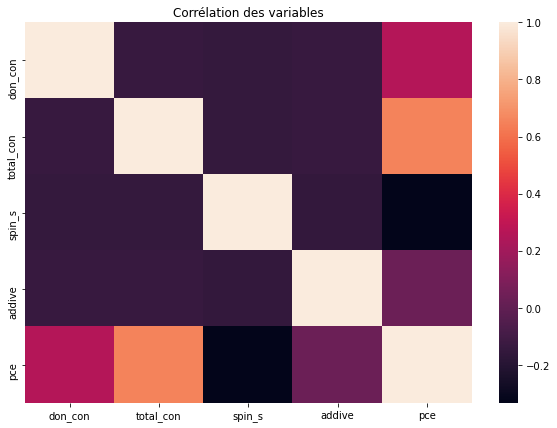

In [12]:
plt.figure(figsize=(10,7))
plt.title('Corrélation des variables')
sns.heatmap(df1.corr())

#### Boxplots :  

{'whiskers': [<matplotlib.lines.Line2D at 0x1619957a7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1619957ae80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1619957a430>,
 'medians': [<matplotlib.lines.Line2D at 0x1619958c580>,
 'fliers': [<matplotlib.lines.Line2D at 0x1619958c8e0>,
 'means': []}

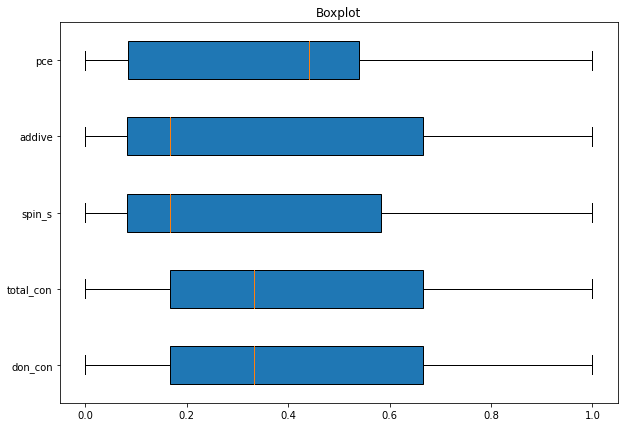

In [13]:
minmax_scale = MinMaxScaler().fit(df1)
df_new = minmax_scale.transform(df1)
plt.figure(figsize=(10,7))
plt.title('Boxplot')
green_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(df_new,flierprops=green_diamond, patch_artist=True, labels=['don_con','total_con','spin_s','addive','pce'], vert = 0)

# Visualisation des données :

<Figure size 720x504 with 0 Axes>

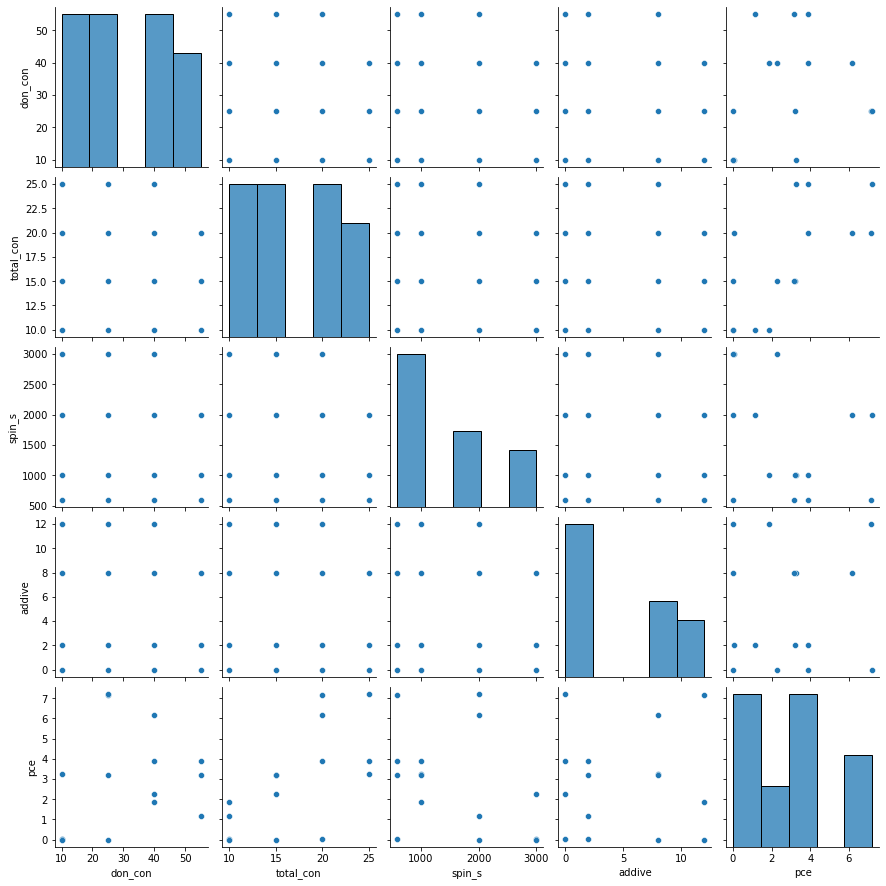

In [14]:
plt.figure(figsize=(10,7))
sns.pairplot(df1) #donne une figure sur laquelle on peut voir toutes les relations entre les différentes variables

## 3- Les modèles de l'apprentissage artificiel (AA) :

In [60]:
data = pd.read_csv("C:/Users/salma/OneDrive/Bureau/Stage 2020-2021/Machine Learning/Publications/OPV_publication/Data/table1_1.csv")
X = data[['don_con','total_con','spin_s']]
Y = data['pce']

# Base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## SVM :

In [61]:

 
model_svr = Pipeline([('scl', StandardScaler()),('clf', SVR(kernel='linear', gamma='scale', C=40, epsilon = 0.7,verbose=True))])
model_svr.fit(X_train, Y_train)


[LibSVM]

Pipeline(steps=[('scl', StandardScaler()),
                ('clf', SVR(C=40, epsilon=0.7, kernel='linear', verbose=True))])

In [62]:
y_pred_svm = model_svr.predict(X_test)
print(y_pred_svm)

[1.63980951 2.55943154 1.30572208]


In [63]:
mse_svm=mean_squared_error(Y_test,y_pred_svm)
print('mse = ',mse_svm)
rmse_svm = sqrt(mse_svm)
print('rmse =', rmse_svm)

mse =  8.347735797381796
rmse = 2.889244848984211


In [64]:
from sklearn.metrics import mean_absolute_error
mae_svm=mean_absolute_error(Y_test,y_pred_svm)
print('mae =',mae_svm)

mae = 2.3750122873619275


In [65]:
from sklearn.metrics import r2_score
r2_svm=r2_score(Y_test,y_pred_svm)
print('R^2 =', r2_svm)

R^2 = -0.8789075665970463


# Arbre de décision :

In [66]:
model_arbre=DecisionTreeRegressor()
model_arbre.fit(X_train,Y_train)

DecisionTreeRegressor()

In [67]:
y_pred_arbre = model_arbre.predict(X_test)

In [68]:
#Model evaluating for test set
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_arbre=mean_squared_error(Y_test,y_pred_arbre)
print('mean squared error :',mse_arbre)
rmse_arbre = sqrt(mse_arbre)
print('rmse:',rmse_arbre)

mean squared error : 8.767905333333333
rmse: 2.9610648985345347


In [69]:
from sklearn.metrics import mean_absolute_error
mae_arbre=mean_absolute_error(Y_test,y_pred_arbre)
print('mae =',mae_arbre)

mae = 2.671333333333333


In [70]:
from sklearn.metrics import r2_score  
r2_arbre=r2_score(Y_test,y_pred_arbre)
print('R^2 = ',r2_arbre)

R^2 =  -0.9734792851462271


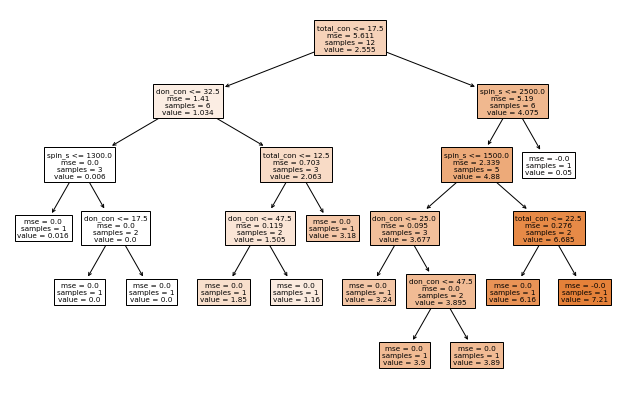

In [71]:
plt.figure(figsize=(11,7))
plot_tree(model_arbre,feature_names = list(X.columns),filled=True)
plt.show()

## Forêt aléatoire

In [72]:
param_grid_foret = { 'random_state' : np.arange(0,10)
                 }
grid_search_foret = GridSearchCV(RandomForestRegressor(), param_grid_foret, cv=5)
grid_search_foret.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [75]:
print ("Score final : ", grid_search_foret.score(X_test, Y_test))
print ("Meilleurs parametres: ", grid_search_foret.best_params_)
print ("Meilleure config: ", grid_search_foret.best_estimator_)

Score final :  -0.8141760971527285
Meilleurs parametres:  {'random_state': 7}
Meilleure config:  RandomForestRegressor(random_state=7)


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
model_foret = RandomForestRegressor(random_state=6)
model_foret.fit(X_train, Y_train)

RandomForestRegressor(random_state=6)

In [77]:
y_pred_foret=model_foret.predict(X_test)

In [78]:
mse_foret=mean_squared_error(Y_test,y_pred_foret)
print('mean squared error :',mse_foret)
rmse_foret = sqrt(mse_foret)
print('rmse:',rmse_foret)

mean squared error : 7.630336265981367
rmse: 2.7623063309454596


In [79]:
from sklearn.metrics import mean_absolute_error
mae_foret=mean_absolute_error(Y_test,y_pred_foret)
print('mae =',mae_foret)

mae = 2.114464499999999


In [80]:
from sklearn.metrics import r2_score
r2_foret=r2_score(Y_test,y_pred_foret)
print ('r2 =',r2_foret)

r2 = -0.7174353493948431
